In [1]:
import numpy as np
import csv
import psycopg2
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
def mylinridgereg(X,Y,lamda):
    p = (np.asmatrix(np.dot(X.T,X) + lamda*np.eye(len(X[0]))))
#     print(p.shape)
    p = np.linalg.pinv(p)
#     print(p.shape)
    q = np.dot(p,X.T)
#     print(q.shape)
    q = np.dot(q,Y)
#     print(Y.shape)
#     print(q.shape)
    return q
    

In [4]:
def mylinridgeregeval(X,w):
    yi = np.dot(X,w)
    return yi

In [5]:
def meansquarederr(label_data,y):
    err = np.square((label_data) - (y))
    
#     print (err)
    err1 = np.average(err)
    return err1

In [6]:
# df = df.drop('x4',axis=1)
# df = df.drop('x6',axis=1)
# df = df.drop('x4',axis=1)
# df = df.drop('x6',axis=1)

In [7]:
input_data = np.asarray(df.drop('x11', axis= 1))
label_data = np.asarray(df['x11'])
input_data=np.insert(input_data,0,np.ones(input_data.shape[0]),1)

label_data = np.reshape(label_data,(-1,1))
# print (input_data[:5])
# print (input_data.shape, label_data.shape)

In [8]:
features_train, features_test, target_train, target_test = train_test_split(input_data,label_data, test_size = 0.20, random_state = 10)


In [9]:
lamdas = [1,10,20,30,40,50]
errl=[]
for i in range(5):
    w=mylinridgereg(features_train,target_train,lamdas[i])
    print(w.shape)
    predicted_train = mylinridgeregeval(features_train,w)
    predicted_test = mylinridgeregeval(features_test,w)
    err = meansquarederr(target_test,predicted_test)
    errl.append(err)
    
lamda = lamdas[errl.index(min(errl))]
# print (lamda)
weights = mylinridgereg(features_train,target_train,lamda)
y1 = mylinridgeregeval(features_test,weights)
err = meansquarederr(target_test,y1)
print (err)
    
     

(11, 1)
(11, 1)
(11, 1)
(11, 1)
(11, 1)
4.507210220447207


In [10]:
# partl = [0.5,0.33,0.25,0.20,0.10]
# minerr=[]
# minlamda=[]
# for i in range(5):
#     features_train, features_test, target_train, target_test = train_test_split(input_data,label_data, test_size = partl[i], random_state = 10)
#     features_train = list(features_train)
# #     print (type(features_train))
#     average = []
#     for i in range(4,len(features_train[0])):
#         avg = 0.0
#         for j in range(len(features_train)):
#             avg += float(features_train[j][i])
#         avg = avg/len(features_train)
# #         print(avg)
# #         print (i)
# #         print(len(features_train))
#         average.append(avg)

# #     print(average)
#     stadev = []
#     for i in range(4,len(features_train[0])):
#         dev=0.0
#         for j in range(len(features_train)):
#             dev = dev+((float(features_train[j][i])-average[i-4])*(float(features_train[j][i])-average[i-4]))
#             dev = dev/len(features_train)
#             dev = math.sqrt(dev)
#         stadev.append(dev)
# #         print(dev)
# #     print(stadev)
#     for i in range(4,len(features_train[0])):
#         for j in range(len(features_train)):
#             (features_train[j][i]) = (float(features_train[j][i]) - average[i-4])/stadev[i-4]
#     for i in range(4,len(features_test[0])):
#         for j in range(len(features_test)):
#             (features_test[j][i]) = (float(features_test[j][i]) - average[i-4])/stadev[i-4]
#     print(features_train[0])
#     features_train = np.array(features_train)
#     lamdas = np.arange(1,50,10)
#     errtest=[]
#     errtrain=[]
#     for i in range(len(lamdas)):
#         w=mylinridgereg(features_train,target_train,lamdas[i])
#         predicted_train = mylinridgeregeval(features_train,w)
#         err = meansquarederr(target_train,predicted_train)
#         errtrain.append(err)
#         predicted_test = mylinridgeregeval(features_test,w)
#         err = meansquarederr(target_test,predicted_test)
#         errtest.append(err)
#     print (errtest)
#     print(errtrain)
#     minerr.append(np.min(errtest))
#     minlamda.append(lamdas[errtest.index(np.min(errtest))])
  
#     plt.subplot(1,2,1)
#     plt.plot(lamdas,errtest,"ko-",label ="test error") 
#     plt.subplot(1,2,2)
#     plt.plot(lamdas,errtrain,label = "train error")
  
#     # naming the x axis 
#     plt.xlabel('lamdas') 
#     # naming the y axis 
#     plt.ylabel('mean square error') 

#     # giving a title to my graph 
# #     plt.title("graph with test partition"+str(partl[i]))

#     # function to show the plot 
#     plt.show() 
# plt.plot(partl,minerr)
# plt.xlabel("partition of test")
# plt.ylabel("min test error")
# plt.title("f(a)")
# plt.show() 

# plt.plot(partl,minlamda)
# plt.xlabel("partition of test")
# plt.ylabel("min lamda")
# plt.title("f(b)")
# plt.show()   

[124.53115809504482, 124.63536314012538, 124.80286181423708, 125.03208970856377, 125.3215413178634]
[118.13951462449887, 118.17195302920658, 118.26819163349488, 118.4266628022981, 118.64585763205052]


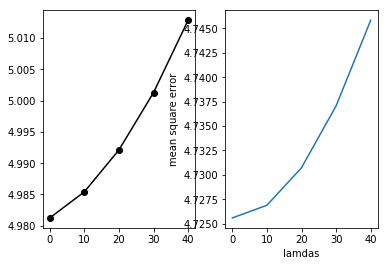

[125.60255664680193, 125.67184736743332, 125.77652591102928, 125.9159467640881, 126.08948215609124]
[118.27892465231295, 118.29703618989173, 118.35092553241837, 118.43993910950327, 118.56344149093486]


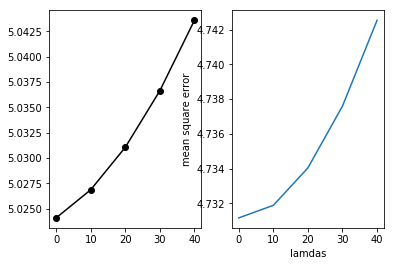

[124.76155867359566, 124.84314500973765, 124.95294182393474, 125.09048726879185, 125.25533095536629]
[119.0292649999361, 119.04373388526646, 119.08682231029928, 119.15806213186474, 119.25699691373124]


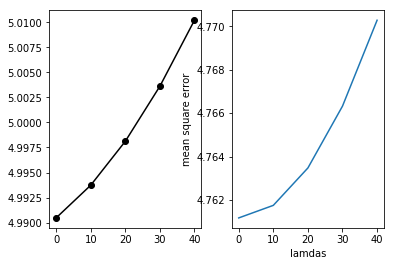

[125.55962823798001, 125.6489467314253, 125.76295596049147, 125.90127870317261, 126.06354641358449]
[118.99479505241423, 119.00751266138101, 119.04540356948002, 119.1080819805027, 119.19517113396526]


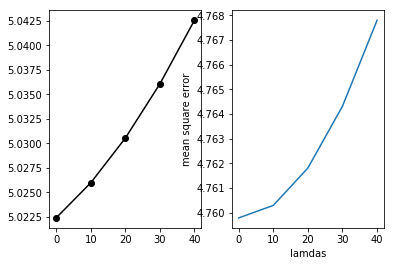

[124.73814677342227, 124.81565564513781, 124.91263500917876, 125.02882233321553, 125.16396039878072]
[119.63764319473857, 119.64770466704289, 119.67770445337638, 119.72737008064662, 119.79643480840875]


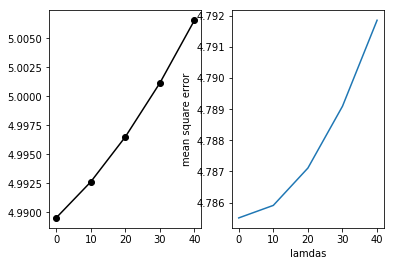

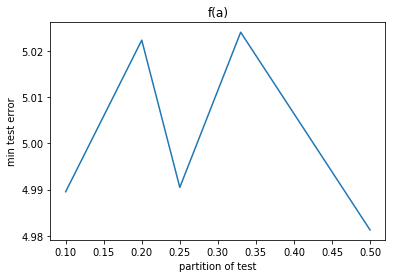

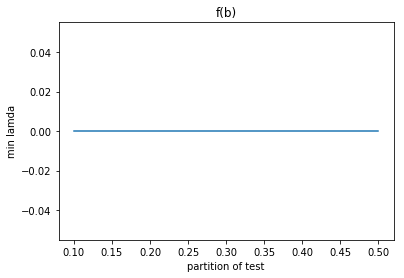

In [11]:
partl = [0.5,0.33,0.25,0.20,0.10]
minerr=[]
minlamda=[]
for l in range(5):
    lamdas = np.arange(0,50,10)
    errtest=[]
    errtrain=[]
    for k in range(len(lamdas)):
        errtest.append(0.0)
        errtrain.append(0.0)
    for m in range(25):
        features_train, features_test, target_train, target_test = train_test_split(input_data,label_data, test_size = partl[l], random_state = m)
        features_train = list(features_train)
    #     print (type(features_train))
        average = []
        for i in range(4,len(features_train[0])):
            avg = 0.0
            for j in range(len(features_train)):
                avg += float(features_train[j][i])
            avg = avg/len(features_train)
    #         print(avg)
    #         print (i)
    #         print(len(features_train))
            average.append(avg)

    #     print(average)
        stadev = []
        for i in range(4,len(features_train[0])):
            dev=0.0
            for j in range(len(features_train)):
                dev = dev+((float(features_train[j][i])-average[i-4])*(float(features_train[j][i])-average[i-4]))
                dev = dev/len(features_train)
                dev = math.sqrt(dev)
            stadev.append(dev)
    #         print(dev)
    #     print(stadev)
        for i in range(4,len(features_train[0])):
            for j in range(len(features_train)):
                (features_train[j][i]) = (float(features_train[j][i]) - average[i-4])/stadev[i-4]
        for i in range(4,len(features_test[0])):
            for j in range(len(features_test)):
                (features_test[j][i]) = (float(features_test[j][i]) - average[i-4])/stadev[i-4]
#         print(features_train[0])
        features_train = np.array(features_train)
        lamdas = np.arange(0,50,10)
        
        for i in range(len(lamdas)):
            w=mylinridgereg(features_train,target_train,lamdas[i])
            predicted_train = mylinridgeregeval(features_train,w)
            err = meansquarederr(target_train,predicted_train)
            errtrain[i]+= err
            predicted_test = mylinridgeregeval(features_test,w)
            err = meansquarederr(target_test,predicted_test)
            errtest[i]+=err
    print (errtest)
    print(errtrain)
    for o in range(len(errtest)):
        errtest[o] = errtest[o]/25
        errtrain[o] = errtrain[o]/25
    minerr.append((np.min(errtest)))
    minlamda.append(lamdas[errtest.index(np.min(errtest))])
  
    plt.subplot(1,2,1)
    plt.plot(lamdas,errtest,"ko-",label ="test error") 
    plt.subplot(1,2,2)
    plt.plot(lamdas,errtrain,label = "train error")
  
    # naming the x axis 
    plt.xlabel('lamdas') 
    # naming the y axis 
    plt.ylabel('mean square error') 

    # giving a title to my graph 
#     plt.title("graph with test partition"+str(partl[i]))

    # function to show the plot 
    plt.show() 
plt.plot(partl,minerr)
plt.xlabel("partition of test")
plt.ylabel("min test error")
plt.title("f(a)")
plt.show() 

plt.plot(partl,minlamda)
plt.xlabel("partition of test")
plt.ylabel("min lamda")
plt.title("f(b)")
plt.show()   

3132
1045
3132
3132
<class 'numpy.ndarray'> [[8.35739461]] [12.02770916]


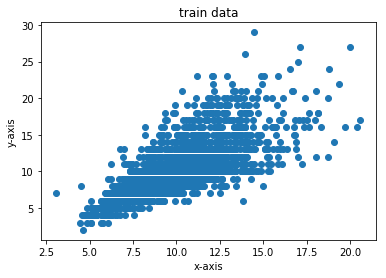

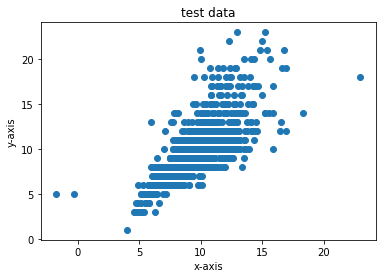

In [12]:
features_train, features_test, target_train, target_test = train_test_split(input_data,label_data, test_size = 0.25, random_state = 10)
w=mylinridgereg(features_train,target_train,1)
predicted_train = mylinridgeregeval(features_train,w)
predicted_test = mylinridgeregeval(features_test,w)



# # predicted_train = predicted_train.T
# predicted_train = predicted_train.flatten()
# predicted_test = predicted_test.T
# predicted_test = list(predicted_test.flatten())
predicted_train = np.asarray(predicted_train)
target_train = target_train.flatten()
target_test = target_test.flatten()


print (np.size(target_train))
print (np.size(target_test))
# target_test = list(target_test)
# predicted_train = list(predicted_train)
# predicted_test = np.reshape(predicted_test)
print (np.size(predicted_train))
print (np.size(target_train))
print (type(predicted_train),predicted_test[0],predicted_train[0])
predicted_test = np.asarray(predicted_test)
target_train = np.asarray(target_train)
plt.scatter(predicted_train,target_train)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("train data")
plt.show() 

plt.scatter(predicted_test,target_test)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("test data")
plt.show() 

In [13]:
# for feature_name in df.columns:
#     if feature_name != 'x1'and feature_name!= 'x2'and feature_name!='x3':
#         avg = df[feature_name].mean()
#         dev = df[feature_name].std()
#         df[feature_name] = (df[feature_name] - avg) / (dev)

# print(df) 

In [14]:
# df = df.drop('x4',axis=1)
# df = df.drop('x6',axis=1)

In [15]:
# input_data1 = np.asarray(df)


In [16]:
# features_train, features_test, target_train, target_test = train_test_split(input_data1,label_data, test_size = 0.20, random_state = 10)


In [17]:
# weights = mylinridgereg(features_train,target_train,lamda)
# y1 = mylinridgeregeval(features_test,weights)
# err = meansquarederr(target_test,y1)
# print (err)

In [18]:
# df = df.drop('x5',axis=1)

In [19]:
# input_data2 = np.asarray(df)

In [20]:
# features_train, features_test, target_train, target_test = train_test_split(input_data2,label_data, test_size = 0.20, random_state = 10)


In [21]:
# weights = mylinridgereg(features_train,target_train,lamda)
# y1 = mylinridgeregeval(features_test,weights)
# err = meansquarederr(target_test,y1)
# print (err)